<a href="https://colab.research.google.com/github/DABallentine/knowledge_discovery_charlotte/blob/main/Jupiter%20Notebooks/EDA_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Charlotte 311 Service Request Analysis

<h1> <b> Exploratory Data Analysis and Preprocessing </b> </h1>

## Data Import and Survey

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Function to read data from URL
def read_data_from_URL(url):
    df=pd.read_csv(url)
    return df

In [3]:
# Read in the data
serv_req_url='https://bitbucket.org/nthammad-uncc/knowledge_discovery_charlotte/raw/3f5574c9648a95b7d760bb2f27e879dcaa78b00a/data/Service_Requests_311.csv'
requests = read_data_from_URL(serv_req_url)
requests.head()

X              Y  OBJECTID             DEPARTMENT  \
0  1.458251e+06  508075.000119         1   Solid Waste Services   
1  1.468687e+06  587225.999953         2  Housing and NBHD Serv   
2  1.471481e+06  562512.999839         3   Solid Waste Services   
3  1.438992e+06  568604.000124         4   Solid Waste Services   
4           NaN            NaN         5                Transit   

              DIVISION  REQUEST_NO  FISCAL_YEAR FISCAL_MONTH  \
0           Sanitation     6402056         2017       05-Nov   
1  311 Partner Liaison     6402064         2017       05-Nov   
2           Sanitation     6402082         2017       05-Nov   
3           Sanitation     6402103         2017       05-Nov   
4   Transit/Operations     6402111         2017       05-Nov   

               REQUEST_TYPE           RECEIVED_DATE  ... ZIP_CODE  \
0      NON_RECYCLABLE ITEMS  2016/11/07 14:25:00+00  ...  28226.0   
1  UTILITY VERIFICATION LTR  2016/11/07 14:28:00+00  ...  28269.0   
2      NON_RECYCLABLE ITEMS  2016/11/07 14:34:00+00  ...  28213.0   
3          MISSED RECYCLING  2016/11/07 14:41:00+00  ...  28216.0   
4          CITIZEN FEEDBACK  2016/11/07 14:44:00+00  ...      NaN   

                                 FULL_ADDRESS    X_COORD   Y_COORD   LATITUDE  \
0      3601 KNAPDALE LN, CHARLOTTE, NC  28226  1458251.0  508075.0  35.132444   
1    4124 SILVERMERE WY, CHARLOTTE, NC  28269  1468687.0  587226.0  35.350408   
2  523 GRAHAM MEADOW DR, CHARLOTTE, NC  28213  1471481.0  562513.0  35.282654   
3       1801 CRANDON DR, CHARLOTTE, NC  28216  1438992.0  568604.0  35.297745   
4                                         NaN        NaN       NaN        NaN   

   LONGITUDE COUNCIL_DISTRICT                                GlobalID  \
0 -80.812089              NaN  {35439C7B-D8E4-4296-9119-8673B1D5A7C8}   
1 -80.781941              NaN  {3B4A2DC0-8886-4E8E-95E6-4F426C4E08E2}   
2 -80.771094              NaN  {C3E4CF76-7630-4356-8216-428445A0903F}   
3 -80.880327              NaN  {FC3B4CD8-1131-42B4-A37E-8CA448855B24}   
4        NaN              NaN  {E0166346-2381-40E1-80A0-2ECA4FB6CB27}   

        PID Shape  
0  20904304   NaN  
1  02731251   NaN  
2  08917486   NaN  
3  03925515   NaN  
4       NaN   NaN  

[5 rows x 30 columns]

In [4]:
print("Records:", requests.shape[0], "\nFeatures:", requests.shape[1])
print(requests.info())

Records: 1631510 
Features: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631510 entries, 0 to 1631509
Data columns (total 30 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   X                           1559084 non-null  float64
 1   Y                           1559084 non-null  float64
 2   OBJECTID                    1631510 non-null  int64  
 3   DEPARTMENT                  1631510 non-null  object 
 4   DIVISION                    1623095 non-null  object 
 5   REQUEST_NO                  1631510 non-null  int64  
 6   FISCAL_YEAR                 1631510 non-null  int64  
 7   FISCAL_MONTH                1631510 non-null  object 
 8   REQUEST_TYPE                1631510 non-null  object 
 9   RECEIVED_DATE               1631510 non-null  object 
 10  INTERNAL_FIELD_OBSERVATION  1631510 non-null  object 
 11  TITLE                       1631510 non-null  object 
 12  CMPD_DIVISION            

## Initial Variable Selection


<b> The following variables will be dropped: </b>
<ol>
<li> X - redundant with X_COORD </li>
<li> Y - redundant with Y_COORD </li>
<li> FISCAL YEAR - redundant with RECEIVED_DATE </li>
<li> FISCAL MONTH - redundant with RECEIVED_DATE </li>
<li> TITLE - redundant with REQUEST_TYPE </li>
<li> CMPD_DIVISION - too many missing values </li>
<li> STREET_DIRECTION - redundant </li>
<li> STREET_NAME - redundant </li>
<li> STREET_TYPE - redundant </li>
<li> CITY - redundant </li>
<li> STATE - redundant </li>
<li> COUNCIL_DISTRICT - too many missing values </li>
<li> GLOBAL_ID - no predictive value </li>
<li> PID - no predictive value </li>
<li> SHAPE - all missing </li>
</ol>

In [5]:
requests.drop(requests.iloc[:, [0,1,4,6,7,11,12,15,16,17,18,19,26,27,28,29]], axis=1, inplace=True)
requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631510 entries, 0 to 1631509
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   OBJECTID                    1631510 non-null  int64  
 1   DEPARTMENT                  1631510 non-null  object 
 2   REQUEST_NO                  1631510 non-null  int64  
 3   REQUEST_TYPE                1631510 non-null  object 
 4   RECEIVED_DATE               1631510 non-null  object 
 5   INTERNAL_FIELD_OBSERVATION  1631510 non-null  object 
 6   NEIGHBORHOOD_PROFILE_AREA   1559062 non-null  float64
 7   BLOCK_NO                    1587157 non-null  float64
 8   ZIP_CODE                    1586427 non-null  float64
 9   FULL_ADDRESS                1624342 non-null  object 
 10  X_COORD                     1559084 non-null  float64
 11  Y_COORD                     1559084 non-null  float64
 12  LATITUDE                    1559077 non-null  float64
 1

In [6]:
backup = requests # make a data backup prior to data manipulations

# Drop all records which are missing addresses or LATITUDE and LONGITUDE
print('Size before dropping records:', requests.shape)
start_size = requests.shape[0]
requests = requests[~requests['FULL_ADDRESS'].isnull() & 
                    ~requests['ZIP_CODE'].isnull() &
                    ~requests['LATITUDE'].isnull() & 
                    ~requests['LONGITUDE'].isnull()]
num_nulls = start_size - requests.shape[0]
print('Size after dropping {dropped} records:'.format(dropped = num_nulls), requests.shape)

Size before dropping records: (1631510, 14)
Size after dropping 99170 records: (1532340, 14)


In [7]:
requests.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532340 entries, 0 to 1631509
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   OBJECTID                    1532340 non-null  int64  
 1   DEPARTMENT                  1532340 non-null  object 
 2   REQUEST_NO                  1532340 non-null  int64  
 3   REQUEST_TYPE                1532340 non-null  object 
 4   RECEIVED_DATE               1532340 non-null  object 
 5   INTERNAL_FIELD_OBSERVATION  1532340 non-null  object 
 6   NEIGHBORHOOD_PROFILE_AREA   1532325 non-null  float64
 7   BLOCK_NO                    1532340 non-null  float64
 8   ZIP_CODE                    1532340 non-null  float64
 9   FULL_ADDRESS                1532340 non-null  object 
 10  X_COORD                     1532340 non-null  float64
 11  Y_COORD                     1532340 non-null  float64
 12  LATITUDE                    1532340 non-null  float64
 1

In [8]:
backup = requests # update the backup after successful variable null value removal

## Survey Request Types and Departments

In [9]:
print("Total unique request categories:", requests['REQUEST_TYPE'].unique().shape[0], "\n")
print("Top 30 categories by volume:\n")
print(requests['REQUEST_TYPE'].value_counts().head(30), "\n")

print("Top 30 departments by volume:\n")
print(requests['DEPARTMENT'].value_counts().head(30))

Total unique request categories: 162 

Top 30 categories by volume:

NON_RECYCLABLE ITEMS         820199
RECYCLABLE ITEMS             196945
HNS HEALTH AND SANITATION     77723
CART REPAIR-GARBAGE           36238
MISSED RECYCLING              27098
SW DOCUMENT GARBAGE           26405
311 DOCUMENT                  22379
SW DOCUMENT RECYCLING         17706
CDOT STREETLIGHT REPAIR       16627
CART ISSUE/MISSING CART       14850
TIRES                         13440
SW DOCUMENT YARD WASTE        13054
DEAD ANIMAL COLLECTION        10701
CART DELIVERY RECYCLING       10385
ZONING/COMPLAINT/ INSPECT      9994
CART(S) DEL- NEW BUILD         9901
CART REPAIR-RECYCLE            9852
CART ONLY DELIVER-GARB         9794
COMPLAINT                      8486
HNS HOUSING                    8161
CART PURCHASE 2ND-GARBAGE      8002
ZON GENERAL INFO  INQUIRY      7894
MISSED GARBAGE                 7127
PARKING ON LAWN WORKDAYS       6812
SWS LIAISON                    5277
CDOT POTHOLE REPAIR            

In [10]:
print("Bottom 50 categories by volume:\n")
print(requests['REQUEST_TYPE'].value_counts().tail(50).sort_values(ascending=True))

Bottom 50 categories by volume:

BUS STOP-FULL TRASH  CAN       1
SW FIELD OBSERVED TO CI        1
SWS MLTFMLY FIELD OBSERVE      1
ON CALL - SWS SPEC SERV        1
SMOKING VEHICLE REPORT         1
SW EXCESSIVE STORM-SW USE      1
DISABILITY ACT                 1
UT/MANDATORY                   1
SW REMINDER BULKY-SW USE       2
BUS STOP-TRASH CAN MISC        2
BULKY ITEM SCHEDULE            3
LAND DEVELOPMENT INQUIRY       4
SW ESCALATION REQUEST          4
BUS FACILITIES MAINT           4
NEW SVC BUSINESS GARBAGE       4
SW REMINDER GARB-SW USE        4
OPINION                        5
CART REPAIR-BUSN GARB          5
UT RATE CHANGE                 7
CART DELIVERY BUSN GARB        7
CART ONLY DELIVER-RECY         8
MUD IN THE STREET              8
TELL TRANSIT CONCERN          10
PARK & REC REFUND/CANCEL      11
SWS CART RETIRE REVIEW        11
CWP REQUEST-HIGH PRIORITY     11
DISABLED INSPECTION (SWS)     12
ZON APPEALS/CITATIONS INQ     14
SUGGESTION/IDEA               19
SW REMINDE

### Display all 311 request types alphabetically

In [11]:
# Set Display Options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Subset requests by unique values, sorted
A_CART = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[0:25].reset_index()
CDOT_COM = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[25:50].reset_index()
CON_INV = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[50:75].reset_index()
INV_PAR = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[75:100].reset_index()
PARK_SWDOC = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[100:125].reset_index()
SWESC_ZON = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[125:150].reset_index()
ZON_ZON = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[150:165].reset_index()

# Combine those 7 Series of 25 values each into 1 data frame for convenient side-by-side display 
categories = pd.concat([A_CART, CDOT_COM, CON_INV, INV_PAR, PARK_SWDOC, SWESC_ZON, ZON_ZON], axis=1)
categories.drop(categories.iloc[:,[0,2,4,6,8,10,12]], axis=1, inplace=True) # drop the index columns
categories.columns = ['A-CART', 'CDOT-COM', 'CON-INV', 'INV-PAR', 'PARK-SWDOC', 'SWESC-ZON', 'ZON-ZON']
categories.reset_index(drop=True)
categories = categories.style.set_properties(**{'text-align': 'left', 'font-size': '12px'}) # left justify for easy comparison of topics to determine possible bins / combinations
categories

## Decisions on selection and binning:

- We will want to retain the option to use all categories and compare that to the performance of our analyses when using self-determined bins.

- Binning roughly around general categories--for example all CART-related requests into one category, cleanliness-related requests such as trash in the street and pollution into one category--we can encode a new column with only 39 categories.

- After binning, any categories with fewer than 30 records are dropped.

- We also eliminate several Solid Waste Services administrative categories, such as data loads, as well as three COVID-19-related categories, which we choose to exclude from this analysis.


In [12]:
# First, drop the excluded request types as described above
types_to_drop = ["UT RATE CHANGE", "UT/LANDSCAPE", "UT/MANDATORY", "SWS CART DATA LOAD", "SWS CART RETIRE REVIEW", "SWS CART SHIPMT REVIEW", "SWS LIAISON", "SWS MLTFMLY FIELD OBSERVE", "SW EXCESSIVE STORM-SW USE", 
                 "SW FIELD OBSERVED TO CI", "SMOKING VEHICLE REPORT", "COVID 19-PRICE GOUGING", "COVID 19-PUBLIC GATHERING", "COVID 19-STAY HOME VIOL", "TELL TRANSIT CONCERN", "ON CALL - SWS SPEC SERV"]
start = requests.shape[0]
requests = requests[~requests['REQUEST_TYPE'].isin(types_to_drop)]
end = requests.shape[0]
print("{0:5d} requests were dropped.".format(start-end))

 8279 requests were dropped.


In [13]:
# Define the 16 request category bins. Twenty-three remaining types will simply be transferred as categories and not binned, making the 39 total categories.
cats = {
    'Category Name':["ESCALATION REQUEST", "BULKY ITEM", "TRANSPORTATION", "CART", "CUSTOMER FEEDBACK", "DISABLED SERVICE", "CWP", "GARBAGE", "RECYCLING", "YARD WASTE", 
                     "DISABILITY ACT", "VIOLATIONS", "WEATHER AND ENVIRONMENTAL", "ADMINISTRATIVE ACTIONS", "CLEANLINESS", "MISSED SERVICE", "ZONING"],
        'Request Types':[["3-1-1 ESCALATION REQUEST",  "SW ESCALATION REQUEST"],
                        ["DAMAGE/INVESTIGATE BULKY",  "INVESTIGATE/CONTACT BULKY",  "SW DOCUMENT BULKY ITEMS",  "SW REMINDER BULKY-SW USE",  "BULKY ITEM SCHEDULE"],
                        ["BUS FACILITIES MAINT",  "BUS STOP-FULL TRASH  CAN",  "BUS STOP-REMOVE TRASH CAN",  "BUS STOP-TRASH CAN MISC",  "CDOT BASKETBALL",  
                         "CDOT CLEAN CATCH BASIN",  "CDOT FLOODING",  "CDOT GRATE DAMAGE/REPLACE",  "CDOT GUARD RAIL",  "CDOT MISCELLANEOUS",  "CDOT NEW CROSSWALK",  
                         "CDOT NEW SIDEWALK",  "CDOT NEW SIGN",  "CDOT NEW STREETLIGHTS",  "CDOT NEW TRAFFIC SIGNAL",  "CDOT POTHOLE REPAIR",  "CDOT RESURFACING ISSUES",  
                         "CDOT ROAD QUALITY",  "CDOT SIDEWALK REPAIR",  "CDOT SIGHT OBSTRUCTION",  "CDOT STREET SIGN REP/REPL",  "CDOT STREETLIGHT REPAIR",  
                         "CDOT TRAF SIGNAL REPAIR",  "CDOT TRAF SIGNAL TIMING",  "CDOT TRAFFIC CALMING", "NCDOT POTHOLE REQUEST",	"SIDEWALK OBSTR CONTAINERS",	
                         "SIDEWALK OBSTRUCT OTHER",	"SIGNS (NOT FOR 311 USE)",	"STREET MAINTENANCE - SNOW",	"STREET SWEEPING/FLUSHING"],
                        ["CART DELIVERY BUSN GARB",  "CART DELIVERY RECYCLING",  "CART ISSUE/MISSING CART",  "CART ONLY DELIVER-GARB",  "CART ONLY DELIVER-RECY",  
                         "CART PICKUP BUSN GARB",  "CART PICKUP- GARBAGE",  "CART PICKUP-RECYCLE",  "CART PURCHASE 2ND-GARBAGE",  "CART PURCHASE 2ND-RECYCLE",  
                         "CART REPAIR-BUSN GARB",  "CART REPAIR-GARBAGE",  "CART REPAIR-RECYCLE",  "CART(S) DEL- NEW BUILD"],
                        ["CITIZEN FEEDBACK",  "COMPLEX PROBLEM",  "COMPLIMENT/THANKS",  "INQUIRY",  "OPINION",  "STW GENERAL INQUIRY",  "SUGGESTION/IDEA",  
                         "MOBILE APP FEEDBACK",  "LAND DEVELOPMENT INQUIRY",  "PLANNING INQUIRY",  "TAX BILL INQUIRY"],
                        ["CURRENT DISABLED SERVICE",  "DISABLED INSPECTION (SWS)"],
                        ["CWP REQUEST",  "CWP REQUEST-HIGH PRIORITY"],
                        ["DAMAGE/INVESTIGATE GARB",  "SW DOCUMENT GARBAGE",  "INVESTIGATE/CONTACT GARB",  "SW REMINDER GARB-SW USE"],
                        ["DAMAGE/INVESTIGATE RECY",  "SW DOCUMENT RECYCLING",  "INVESTIGATE/CONTACT RECY",  "SW REMINDER RECY-SW USE"],
                        ["DAMAGE/INVESTIGATE YRD WS",  "SW DOCUMENT YARD WASTE",  "INVESTIGATE/CONTACT YD WT",  "SW REMINDER YARD-SW USE"],
                        ["DISABILITY ACT",  "DISABILITY CANCEL/ CHANGE", "REQUEST DISABILITY FORM"],
                        ["DUMPING IN STREET/ROW",  "GRAFFITI",  "PARKING ON LAWN OFFHOURS",  "PARKING ON LAWN WORKDAYS",  "SWAT-A-LITTERBUG"],
                        ["EROSION",  "FLOODING",  "LANDSCAPE LIMBS",  "LANDSCAPE TREES"],
                        ["NEW SERVICE/CHNG MLTIPLX",  "NEW SVC BUSINESS GARBAGE",  "NON-RESIDEN BUILDING CODE",  "MULTIPLEX REVIEW",  
                         "PARK & REC REFUND/CANCEL",  "INVALID/NEW SW ADDRESS"],
                        ["SPILLED BULKY ITEMS",  "SPILLED GARBAGE",  "SPILLED RECYCLING",  "SPILLED YARD WASTE",  "MUD IN STREET-CONSTRUCTIO",  
                         "MUD IN THE STREET",  "LITTER/DEBRIS IN STREET",  "POLLUTION"],
                        ["MISSED BULKY ITEM",  "MISSED BUSINESS GARBAGE",  "MISSED GARBAGE",  "MISSED RECYCLING",  "MISSED YARD WASTE"],
                        ["ZON ABC PERMITS INQUIRY",  "ZON APPEALS/CITATIONS INQ",  "ZON DAYCARE/CHILDCARE INQ",  "ZON FENCE/OPEN SPACE INQ",  
                         "ZON HOLDS RELEASE REQUEST",  "ZON RESIDENTIAL PERMITS",  "ZON SETBACKS",  "ZON SIGNS INQUIRY",  "ZON STORAGE BLDG/ACC UNIT",  
                         "ZON SUBDIVIDE PROP/DUPLX",  "ZON SUPERVISORY COMPLAINT",  "ZON VERIFICATION LETTERS",  "ZON WATERSHED/SWPE INQ",  "ZONGROUP/BOARDING HOMES",  
                         "ZONHOME BUSINESS/APPROVAL",  "ZONMOBILE FOOD/TENT SALES",  "ZONSETBACKS/STORAGE BUILD"]]
        }
cats = pd.DataFrame(cats)
cats

Category Name                                      Request Types
0          ESCALATION REQUEST  [3-1-1 ESCALATION REQUEST, SW ESCALATION REQUEST]
1                  BULKY ITEM  [DAMAGE/INVESTIGATE BULKY, INVESTIGATE/CONTACT...
2              TRANSPORTATION  [BUS FACILITIES MAINT, BUS STOP-FULL TRASH  CA...
3                        CART  [CART DELIVERY BUSN GARB, CART DELIVERY RECYCL...
4           CUSTOMER FEEDBACK  [CITIZEN FEEDBACK, COMPLEX PROBLEM, COMPLIMENT...
5            DISABLED SERVICE  [CURRENT DISABLED SERVICE, DISABLED INSPECTION...
6                         CWP           [CWP REQUEST, CWP REQUEST-HIGH PRIORITY]
7                     GARBAGE  [DAMAGE/INVESTIGATE GARB, SW DOCUMENT GARBAGE,...
8                   RECYCLING  [DAMAGE/INVESTIGATE RECY, SW DOCUMENT RECYCLIN...
9                  YARD WASTE  [DAMAGE/INVESTIGATE YRD WS, SW DOCUMENT YARD W...
10             DISABILITY ACT  [DISABILITY ACT, DISABILITY CANCEL/ CHANGE, RE...
11                 VIOLATIONS  [DUMPING IN STREET/ROW, GRAFFITI, PARKING ON L...
12  WEATHER AND ENVIRONMENTAL  [EROSION, FLOODING, LANDSCAPE LIMBS, LANDSCAPE...
13     ADMINISTRATIVE ACTIONS  [NEW SERVICE/CHNG MLTIPLX, NEW SVC BUSINESS GA...
14                CLEANLINESS  [SPILLED BULKY ITEMS, SPILLED GARBAGE, SPILLED...
15             MISSED SERVICE  [MISSED BULKY ITEM, MISSED BUSINESS GARBAGE, M...
16                     ZONING  [ZON ABC PERMITS INQUIRY, ZON APPEALS/CITATION...

In [14]:
# Default the category value initially to be the request type
requests['REQUEST_CAT'] = requests['REQUEST_TYPE'] 

# Encode new column by binning the categories. Default values of request type will then remain for the 23 smaller categories.
for cat in range(len(cats)) :
    label = cats.iloc[cat][0]
    requests.loc[requests['REQUEST_TYPE'].isin(cats.iloc[cat][1]), 'REQUEST_CAT'] = label

# Reorder the columns
requests = requests.iloc[:,[0,1,2,14,3,4,5,6,7,8,9,10,11,12,13]]

<ipython-input-14-8d46e5c07e51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  requests['REQUEST_CAT'] = requests['REQUEST_TYPE']
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [15]:
backup = requests # update the backup after successful variable addition and column reorder

In [16]:
request_cats = requests[['REQUEST_CAT']].value_counts()
cat_names = request_cats.to_frame().reset_index()
cat_names.columns = ['Category', 'Count']

plt.figure(figsize=(18,9))
x_pos = [i for i, _ in enumerate(request_cats)]
x = range(len(request_cats))
y = request_cats
plt.bar(x, y, color='maroon')
plt.yscale('log')
plt.xlabel("Request Categories", fontweight='bold', fontsize=16)
plt.ylabel("Number of Requests", fontweight='bold', fontsize=16)
plt.title("Number of Requests by Category", fontweight='bold', fontsize=20)

plt.xticks(x_pos, cat_names.iloc[:,0], rotation=90)

plt.show()

In [17]:
# Set sorting order for REQUEST_CAT to keep this highest volume to lowest volume order for the whole data set
cat_order = cat_names['Category'].tolist()
requests['REQUEST_CAT'] = pd.Categorical(requests['REQUEST_CAT'], cat_order, ordered=True)

## Observations on Request Categories

By binning many of the related categories, we have a much more balanced grouping of categories in the 10-100k range than we did before. Of course the two major categories of Non-recyclable and Recyclable Items are still several times larger than the others, but we may be able to see more useful trends within the 3rd through 17th largest categories than we otherwise would have.

## Request Categories Time Series and Seasonality

In [18]:
# Divide categories by season of the year
requests['RECEIVED_DATE'] = pd.to_datetime(requests['RECEIVED_DATE'], format='%Y/%m/%d %H:%M')
requests['SEASON'] = requests['RECEIVED_DATE'].dt.quarter

# Create new columns in the requests dataset for month and year
requests['RECEIVED_MONTH']= pd.to_datetime(requests['RECEIVED_DATE']).dt.month
requests['RECEIVED_YEAR']= pd.to_datetime(requests['RECEIVED_DATE']).dt.year
requests = requests.iloc[:,[0,1,2,3,4,5,16,17,15,6,7,8,9,10,11,12,13,14]] # reorder columns
requests.head()

OBJECTID             DEPARTMENT  REQUEST_NO               REQUEST_CAT              REQUEST_TYPE             RECEIVED_DATE  RECEIVED_MONTH  RECEIVED_YEAR  SEASON INTERNAL_FIELD_OBSERVATION  NEIGHBORHOOD_PROFILE_AREA  BLOCK_NO  ZIP_CODE                                FULL_ADDRESS    X_COORD   Y_COORD   LATITUDE  LONGITUDE
0         1   Solid Waste Services     6402056      NON_RECYCLABLE ITEMS      NON_RECYCLABLE ITEMS 2016-11-07 14:25:00+00:00              11           2016       4                          N                      215.0    3601.0   28226.0      3601 KNAPDALE LN, CHARLOTTE, NC  28226  1458251.0  508075.0  35.132444 -80.812089
1         2  Housing and NBHD Serv     6402064  UTILITY VERIFICATION LTR  UTILITY VERIFICATION LTR 2016-11-07 14:28:00+00:00              11           2016       4                          N                      265.0    4124.0   28269.0    4124 SILVERMERE WY, CHARLOTTE, NC  28269  1468687.0  587226.0  35.350408 -80.781941
2         3   Solid Waste Services     6402082      NON_RECYCLABLE ITEMS      NON_RECYCLABLE ITEMS 2016-11-07 14:34:00+00:00              11           2016       4                          N                      103.0     523.0   28213.0  523 GRAHAM MEADOW DR, CHARLOTTE, NC  28213  1471481.0  562513.0  35.282654 -80.771094
3         4   Solid Waste Services     6402103            MISSED SERVICE          MISSED RECYCLING 2016-11-07 14:41:00+00:00              11           2016       4                          N                      158.0    1801.0   28216.0       1801 CRANDON DR, CHARLOTTE, NC  28216  1438992.0  568604.0  35.297745 -80.880327
5         6           Finance/City     6402112                       CWP               CWP REQUEST 2016-11-07 14:45:00+00:00              11           2016       4                          N                       88.0     309.0   28208.0    309 JONES ST APT 1, CHARLOTTE, NC  28208  1439454.0  552715.0  35.254120 -80.877772

### 311 Service requests plotted over various time scales

In [19]:
# 311 Service requests plotted over various time scales
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
requests.groupby(requests['RECEIVED_YEAR'].rename('Year')).size().plot.bar()
plt.title("311 Requests by Year")
plt.xticks(ticks=range(6), rotation=0)
plt.subplot(2,2,2)
requests.groupby(requests['RECEIVED_MONTH'].rename('Month')).size().plot.bar()
plt.title("311 Requests by Month")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)
plt.subplot(2,2,3)
requests.groupby(requests['RECEIVED_DATE'].rename('Day of Week').dt.dayofweek).size().plot.bar()
plt.title("311 Requests by Day of the Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0)
plt.subplot(2,2,4)
requests.groupby(requests['RECEIVED_DATE'].rename('Time of Day').dt.hour).size().plot.bar()
plt.title("311 Requests by Time of Day")
plt.xticks(ticks=range(24), rotation=0)
plt.tight_layout(pad=2.0)

### Top 3 categories in each month ranked by highest proportions of total requests for that category

In [20]:
# Initialize lists to store values from the loop below
top3s = []
labels0 = []
labels1 = []
labels2 = []
plotdata = []

# Loop through the months, select top 3 categories and their corresponding labels
for i in range(0,12) :  # for each month
  request_cats_month = requests['RECEIVED_MONTH'].eq(i+1).groupby(requests['REQUEST_CAT']).sum()  # get the value counts by request category
  proportions = request_cats_month.to_numpy()/request_cats.to_numpy() * 100  # convert the counts to proportion of that category that occurred in that month
  month_max3 = (-np.round(proportions,1)).argsort()[:3]  # select the top 3 
  top3s.append(month_max3) # and store them in a list
  month_labels = cat_names['Category'].iloc[month_max3,].values  # retrieve those category labels
  labels0.append(month_labels[0]) # store them in 3 separate lists
  labels1.append(month_labels[1])
  labels2.append(month_labels[2])
  plotdata.append(proportions[month_max3]) # store the proportion values in plotdata

plotdata = pd.DataFrame(plotdata, index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], columns=['Top1', 'Top2', 'Top3'])
plotlabels = labels0 + labels1 + labels2

# Plot
plt.rcParams["figure.figsize"] = (22,9)
ax = plotdata.plot(kind="bar")
ax.set_title("Top 3 request categories by month", fontweight='bold', fontsize=22)
ax.set_xlabel("Month", fontweight='bold', fontsize=18)
ax.set_ylabel("Proportion of Request Category", fontweight='bold', fontsize=18)
ax.set_xticklabels(plotdata.index.values.tolist(), rotation=0, fontweight='bold', fontsize=14)

rects = ax.patches
for rect, label in zip(rects, plotlabels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="left", va="bottom", rotation=30
    )
    ax.text(
        rect.get_x() + rect.get_width() / 2, height-5 , "{:.1%}".format(height/100), ha="center", va="bottom", rotation=90
    )

plt.show()

### Seasonality

In [21]:
# Get value counts of each category by season
request_cats_winter = requests['SEASON'].eq(1).groupby(requests['REQUEST_CAT']).sum()
request_cats_spring = requests['SEASON'].eq(2).groupby(requests['REQUEST_CAT']).sum()
request_cats_summer = requests['SEASON'].eq(3).groupby(requests['REQUEST_CAT']).sum()
request_cats_fall = requests['SEASON'].eq(4).groupby(requests['REQUEST_CAT']).sum()

In [22]:
backup = requests # update the backup after successful variable addition and type conversion

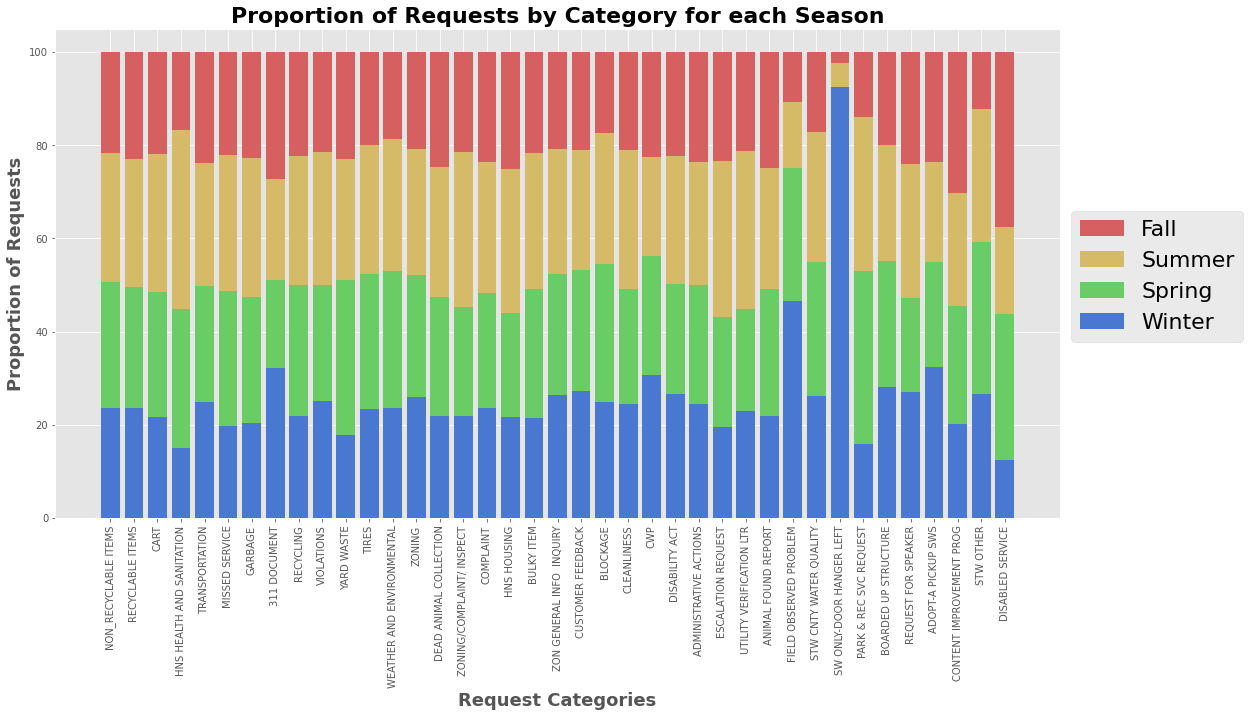

In [23]:
# Plot proportion of requests by category for each season
plt.figure(figsize=(18,9))
pal = sns.color_palette('muted').as_hex()

x_pos = [i for i, _ in enumerate(request_cats)]
x = range(len(request_cats))
y1 = request_cats_winter.to_numpy()/request_cats.to_numpy() * 100
y2 = request_cats_spring.to_numpy()/request_cats.to_numpy() * 100
y3 = request_cats_summer.to_numpy()/request_cats.to_numpy() * 100
y4 = request_cats_fall.to_numpy()/request_cats.to_numpy() * 100

plt.bar(x, y1, color=pal[0], label='Winter')
plt.bar(x, y2, color=pal[2], label='Spring', bottom=y1)
plt.bar(x, y3, color=pal[8], label='Summer', bottom=y1+y2)
plt.bar(x, y4, color=pal[3], label='Fall', bottom=y1+y2+y3)

plt.xlabel("Request Categories", fontweight='bold', fontsize=18)
plt.ylabel("Proportion of Requests", fontweight='bold', fontsize=18)
plt.title("Proportion of Requests by Category for each Season", fontweight='bold', fontsize=22)
plt.xticks(x_pos, cat_names.iloc[:,0], rotation=90)

plt.legend(handles=reversed(plt.legend().legendHandles), labels=['Fall','Summer','Spring','Winter'],
           loc='upper left', bbox_to_anchor=(1, 0.65), fontsize=22)
plt.show()

In [24]:
# Display the largest proportions of requests by category for each season

# Sort and select the top 3 values
win_max3 = (-np.round(y1,1)).argsort()[:3]
spr_max3 = (-np.round(y2,1)).argsort()[:3]
sum_max3 = (-np.round(y3,1)).argsort()[:3]
fal_max3 = (-np.round(y4,1)).argsort()[:3]

# Retrieve the labels for each season's top 3 categories
win_labels = cat_names['Category'].iloc[win_max3,].values
spr_labels = cat_names['Category'].iloc[spr_max3,].values
sum_labels = cat_names['Category'].iloc[sum_max3,].values
fal_labels = cat_names['Category'].iloc[fal_max3,].values

# Rearrange labels into one list
plotlabels = []
for i in range(0,3) :
  plotlabels.append(win_labels[i])
  plotlabels.append(spr_labels[i])
  plotlabels.append(sum_labels[i])
  plotlabels.append(fal_labels[i])

# Combine data into one frame
plotdata = pd.DataFrame({
    "Winter":y1[win_max3],
    "Spring":y2[spr_max3],
    "Summer":y3[sum_max3],
    "Fall":y4[fal_max3]
    }, 
    index=["Top1", "Top2", "Top3"]
).transpose()

# Plot
plt.rcParams["figure.figsize"] = (18,9)

ax = plotdata.plot(kind="bar")
ax.set_title("Top 3 request categories by season", fontweight='bold', fontsize=22)
ax.set_xlabel("Season", fontweight='bold', fontsize=18)
ax.set_ylabel("Proportion of Request Category", fontweight='bold', fontsize=18)
ax.set_xticklabels(plotdata.index.values.tolist(), rotation=0, fontweight='bold', fontsize=14)

rects = ax.patches
for rect, label in zip(rects, plotlabels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 2, label, ha="left", va="bottom", rotation=30
    )
    ax.text(
        rect.get_x() + rect.get_width() / 2, height - 3, "{:.1%}".format(height/100), ha="center", va="bottom"
    )

plt.show()

### Time Series and Seasonality with Facebook Prophet

In [25]:
!pip install pystan==2.19.1.1
!pip install prophet
!pip install --upgrade plotly

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import datetime

Requirement already up-to-date: plotly in /opt/anaconda3/lib/python3.8/site-packages (5.3.1)


In [26]:
# Round off the RECEIVED_DATE column to the nearest hour
requests['RECEIVED_DATE']=requests['RECEIVED_DATE'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour))

In [27]:
#store date value only in a column
requests['RECEIVED_DAY']=pd.to_datetime(requests['RECEIVED_DATE']).dt.date

In [28]:
# Create a dataset of counts of request every hour
requests_by_hour=requests.groupby(['RECEIVED_DATE']).size().reset_index(name='HOURLY_REQUEST_COUNT')

In [29]:
requests_by_hour.head()

RECEIVED_DATE  HOURLY_REQUEST_COUNT
0 2016-07-01 08:00:00                     1
1 2016-07-01 10:00:00                     3
2 2016-07-01 11:00:00                    29
3 2016-07-01 12:00:00                    71
4 2016-07-01 13:00:00                    64

In [30]:
# Create a dataset of counts of request every day
requests_by_day=requests.groupby(['RECEIVED_DAY']).size().reset_index(name='DAILY_REQUEST_COUNT')

In [31]:
requests_by_day.head()

RECEIVED_DAY  DAILY_REQUEST_COUNT
0   2016-07-01                  818
1   2016-07-02                  122
2   2016-07-03                  138
3   2016-07-04                  203
4   2016-07-05                 1478

In [32]:
# Confirm the range of dates present in the data set
print('Earliest Date: {min}'.format(min=requests_by_day['RECEIVED_DAY'].min()))
print('Latest Date: {max}'.format(max=requests_by_day['RECEIVED_DAY'].max()))

Earliest Date: 2016-07-01
Latest Date: 2021-12-22


In [33]:
# Update the names of columns before modeling
requests_by_day.rename(columns={'RECEIVED_DAY': 'ds', 'DAILY_REQUEST_COUNT': 'y'}, inplace=True)
requests_by_hour.rename(columns={'RECEIVED_DATE': 'ds', 'HOURLY_REQUEST_COUNT': 'y'}, inplace=True)

In [34]:
# Initialize both day-wise and hour-wise models
model_day=Prophet()
model_hour=Prophet()

model_day.fit(requests_by_day)
model_hour.fit(requests_by_hour)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
# Create a dataframe of possible future dates to predict for both requests_by_day and requests_by_hour
future_req_by_day=model_day.make_future_dataframe(periods=365)

In [36]:
future_req_by_hour=model_hour.make_future_dataframe(periods=300, freq='H')

In [37]:
# Predict the number of requests per day for future dates 
forecast_by_day = model_day.predict(future_req_by_day)
forecast_by_day[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(2)

ds         yhat  yhat_lower   yhat_upper
2212 2022-12-21  1128.728066  834.286464  1435.017836
2213 2022-12-22  1026.115296  724.635625  1320.324767

In [38]:
#predict the number of requests per hour for future date and times
forecast_by_hour = model_hour.predict(future_req_by_hour)
forecast_by_hour[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(2)

ds       yhat  yhat_lower  yhat_upper
37739 2022-01-04 06:00:00  24.598395   -7.486029   59.224345
37740 2022-01-04 07:00:00  20.577710  -16.057626   58.098933

In [39]:
# Interactive plot of time series by day
plot_plotly(model_day,forecast_by_day)

### Holiday Effects
Carolina Panthers home games data were retrieved from https://fixturedownload.com/sport/american-football.

Federal US holidays were imported through the prophet package.

In [40]:
# Load holiday data.
panthers_game_url='https://media.githubusercontent.com/media/DABallentine/knowledge_discovery_charlotte/main/Data/panthers_games.csv'
panthers_games = read_data_from_URL(panthers_game_url) 

panthers_games['ds'] = pd.to_datetime(panthers_games['ds']).dt.date
panthers_games['lower_window'] = -1
panthers_games['upper_window'] = 0
panthers_games.head()

ds             holiday  lower_window  upper_window
0  2016-09-18  Panthers Home Game            -1             0
1  2016-09-25  Panthers Home Game            -1             0
2  2016-10-30  Panthers Home Game            -1             0
3  2016-11-10  Panthers Home Game            -1             0
4  2016-11-12  Panthers Home Game            -1             0

In [41]:
# Instantiate the model with all holidays and predict a forecast
model_holidays = Prophet(holidays=panthers_games).add_country_holidays(country_name='US')
forecast = model_holidays.fit(requests_by_day).predict(future_req_by_day)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
# List all holidays included in the model
model_holidays.train_holiday_names

0                       Panthers Home Game
1                           New Year's Day
2               Martin Luther King Jr. Day
3                    Washington's Birthday
4                             Memorial Day
5                         Independence Day
6                                Labor Day
7                             Columbus Day
8                             Veterans Day
9                             Thanksgiving
10                           Christmas Day
11                Christmas Day (Observed)
12               New Year's Day (Observed)
13                 Veterans Day (Observed)
14             Independence Day (Observed)
15    Juneteenth National Independence Day
dtype: object

In [43]:
# Plot forecast with all holidays
fig = model_holidays.plot_components(forecast, 'holidays')

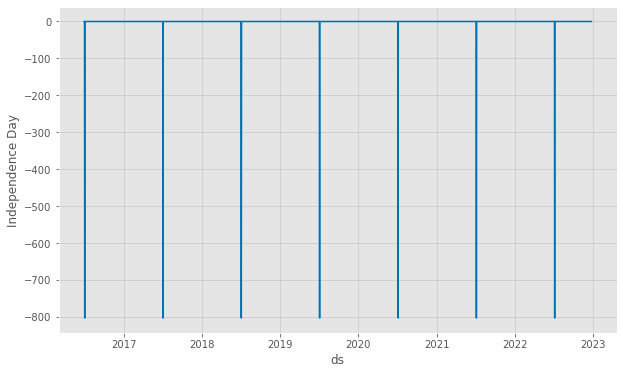

In [44]:
# Plot holidays of interest individually
from prophet.plot import plot_forecast_component

fig = plot_forecast_component(model_holidays, forecast, 'Christmas Day')
fig = plot_forecast_component(model_holidays, forecast, 'Independence Day')
fig = plot_forecast_component(model_holidays, forecast, 'Panthers Home Game')

## Conclusions on Holiday Effects.

As would be expected, the majority of holidays result in a significantly lower number of 311 service calls. As the plot immediately above indicates, weekends with a Carolina Panthers home game tend to see a mild increase in the number of calls.

## Observations on Time Series and Seasonality

The category with the greatest disparity, SW ONLY - DOOR HANGER LEFT, seems to represent a note left on someone's door by the Solid Waste department. Possible reasons for this trend include a large proportion of the population traveling during the winter months. A closer look reveals that the peak actually occurs in February and March, so it does not seem to correlate to the Christmas or New Year holidays. Without additional data going deeper into the nature of this category, it is difficult to surmise what the trend may represent. FIELD OBSERVED PROBLEMs, almost 50% of which occur during Winter, also occur at a similarly high rate into April, totaling 73% of the year's records just in the first 4 months. This trend could provide a starting point for future research. What are the nature of those field-observed problems? Are there simply more city employees driving around during the early months of the year, or is there some seasonal effect pertaining to winter weather perhaps? We could perhaps answer those questions with the right data added to this analysis.

Several of the other categories align with common sense. For example, in Spring people return to the city parks, and issues which have cropped up unnoticed over the Winter months are identified and reported. Likewise, as the weather warms and the plants grow, people trim hedges, clean out and re-landscape old areas, and thus have more yard waste than at other times during the year.

## Customers with the highest number of requests

In [45]:
# Create an index ID for addresses in descending order of 311 call volume, and replace addresses in the data set with their index values
address_indices = requests['FULL_ADDRESS'].value_counts().to_frame(name='COUNT').reset_index()
address_indices['new_column'] = range(len(address_indices))
address_indices['new_column'] += 1
address_indices.columns = ['FULL_ADDRESS', 'TOTAL_CALLS', 'ADDRESS_ID']

# Merge new variables
requests = requests.merge(address_indices, on='FULL_ADDRESS')

# Drop full address column
requests = requests.drop(columns=['FULL_ADDRESS']).sort_values(by='OBJECTID').reset_index(drop=True)
#requests = requests.iloc[:,[0,2,1,3,4,5,6,7,8,9,18,17,10,11,12,13,14,15,16]]

In [46]:
requests.head()

OBJECTID             DEPARTMENT  REQUEST_NO               REQUEST_CAT              REQUEST_TYPE       RECEIVED_DATE  RECEIVED_MONTH  RECEIVED_YEAR  SEASON INTERNAL_FIELD_OBSERVATION  NEIGHBORHOOD_PROFILE_AREA  BLOCK_NO  ZIP_CODE    X_COORD   Y_COORD   LATITUDE  LONGITUDE RECEIVED_DAY  TOTAL_CALLS  ADDRESS_ID
0         1   Solid Waste Services     6402056      NON_RECYCLABLE ITEMS      NON_RECYCLABLE ITEMS 2016-11-07 14:00:00              11           2016       4                          N                      215.0    3601.0   28226.0  1458251.0  508075.0  35.132444 -80.812089   2016-11-07           15       21142
1         2  Housing and NBHD Serv     6402064  UTILITY VERIFICATION LTR  UTILITY VERIFICATION LTR 2016-11-07 14:00:00              11           2016       4                          N                      265.0    4124.0   28269.0  1468687.0  587226.0  35.350408 -80.781941   2016-11-07           10       45105
2         3   Solid Waste Services     6402082      NON_RECYCLABLE ITEMS      NON_RECYCLABLE ITEMS 2016-11-07 14:00:00              11           2016       4                          N                      103.0     523.0   28213.0  1471481.0  562513.0  35.282654 -80.771094   2016-11-07            7       70412
3         4   Solid Waste Services     6402103            MISSED SERVICE          MISSED RECYCLING 2016-11-07 14:00:00              11           2016       4                          N                      158.0    1801.0   28216.0  1438992.0  568604.0  35.297745 -80.880327   2016-11-07           21        8642
4         6           Finance/City     6402112                       CWP               CWP REQUEST 2016-11-07 14:00:00              11           2016       4                          N                       88.0     309.0   28208.0  1439454.0  552715.0  35.254120 -80.877772   2016-11-07            7       73552

In [47]:
backup = requests # update the backup after successful merge of computed/transformed variables

In [48]:
# Using address as "customer"
address_ranks = requests['ADDRESS_ID'].value_counts().head(20)

plt.figure(figsize=(18,9))
x_pos = [i for i, _ in enumerate(address_ranks)]
x = range(20)
y = address_ranks
plt.bar(x, y, color='green')
plt.xlabel("Top 20 addresses")
plt.ylabel("Number of Requests")
plt.title("Top 20 addresses' request volume")

plt.xticks(x_pos, x)

plt.show()

## Observations on Customers

The first address is clearly an outlier in terms of number of total requests. By using each unique address as a "customer", we see one address that is 75% higher than the next highest address by call volume, and thereafter a fairly steady decrease across all addresses. The number one address corresponds to the Sharon Lakes Comdominiums complex located in Starmount Forest, in south Charlotte. The next few addresses also appear to be townhome developments or apartment complexes at various locations across the city. However, the #4 address is in close proximity to the #1 address, which may represent an area of high call volume worth investigating.

## Importing CMPD Crime dataset

In [49]:
#importing CMPD incident crime report data file that has already been preprocessed
violent_crime_url='https://media.githubusercontent.com/media/DABallentine/knowledge_discovery_charlotte/origin/NaomiT/Data/final_criminal_data.csv'
violent_crime_df = read_data_from_URL(violent_crime_url)
violent_crime_df.head()

Unnamed: 0 COL_MERGE_INDEX  INCIDENT_COUNT  CRIME_SCORE
0           0        3_7_2021             168     2.483003
1           1      371_5_2017             163     2.358559
2           2      371_1_2017             161     2.384479
3           3        3_6_2021             151     2.307810
4           4      371_3_2017             149     2.478377

In [50]:
print("Records:", violent_crime_df.shape[0], "\nFeatures:", violent_crime_df.shape[1])

Records: 22848 
Features: 4


In [51]:
violent_crime_df.drop(violent_crime_df.iloc[:,[0,2]],axis=1,inplace=True)

## Merge service requests with violent crime

In [52]:
# sort the requests dataset by NEIGHBORHOOD_PROFILE_AREA 
requests.sort_values("NEIGHBORHOOD_PROFILE_AREA").head()

OBJECTID            DEPARTMENT  REQUEST_NO                REQUEST_CAT          REQUEST_TYPE       RECEIVED_DATE  RECEIVED_MONTH  RECEIVED_YEAR  SEASON INTERNAL_FIELD_OBSERVATION  NEIGHBORHOOD_PROFILE_AREA  BLOCK_NO  ZIP_CODE    X_COORD   Y_COORD   LATITUDE  LONGITUDE RECEIVED_DAY  TOTAL_CALLS  ADDRESS_ID
950061   1013870        Transportation     7768524             TRANSPORTATION   CDOT POTHOLE REPAIR 2020-03-03 12:00:00               3           2020       1                          N                        2.0    3058.0   28205.0  1467856.0  537330.0  35.213292 -80.781724   2020-03-03            5       95417
194986    207899  Solid Waste Services     6339181       NON_RECYCLABLE ITEMS  NON_RECYCLABLE ITEMS 2016-09-01 22:00:00               9           2016       3                          N                        2.0    3110.0   28205.0  1464771.0  536444.0  35.210706 -80.791998   2016-09-01           17       15198
487311    519283  Solid Waste Services     6324528       NON_RECYCLABLE ITEMS  NON_RECYCLABLE ITEMS 2016-08-19 20:00:00               8           2016       3                          N                        2.0    1201.0   28205.0  1465315.0  536675.0  35.211367 -80.790191   2016-08-19            9       50796
562187    599290        Transportation     6595265             TRANSPORTATION         CDOT FLOODING 2017-05-23 17:00:00               5           2017       2                          N                        2.0    1203.0   28205.0  1465033.0  535599.0  35.208398 -80.791069   2017-05-23            6       90425
562190    599293  Storm Water Services     6595278  WEATHER AND ENVIRONMENTAL              FLOODING 2017-05-23 17:00:00               5           2017       2                          N                        2.0    1203.0   28205.0  1465033.0  535599.0  35.208398 -80.791069   2017-05-23            6       90425

In [53]:
# view the 'NEIGHBORHOOD_PROFILE_AREA', 'RECEIVED_YEAR', RECEIVED_MONTH' columns in the requests dataframe
requests[['NEIGHBORHOOD_PROFILE_AREA','RECEIVED_YEAR','RECEIVED_MONTH']].head(10)

NEIGHBORHOOD_PROFILE_AREA  RECEIVED_YEAR  RECEIVED_MONTH
0                      215.0           2016              11
1                      265.0           2016              11
2                      103.0           2016              11
3                      158.0           2016              11
4                       88.0           2016              11
5                       97.0           2016              11
6                       76.0           2016              11
7                      372.0           2017               8
8                      251.0           2017               8
9                      190.0           2017               8

### Neighborhood Profile Area column is common between the crime dataset and 311-service requests dataset. This can be mapped in a better way using the month and year columns similar to the index created on the violent crime dataset

The only downside to this is that 311-service requests data also has request from the year 2016 which are unavailable in the CMPD crime dataset. So we map those service request records to the crime score of the year 2017

In [54]:
requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524061 entries, 0 to 1524060
Data columns (total 20 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   OBJECTID                    1524061 non-null  int64         
 1   DEPARTMENT                  1524061 non-null  object        
 2   REQUEST_NO                  1524061 non-null  int64         
 3   REQUEST_CAT                 1524061 non-null  category      
 4   REQUEST_TYPE                1524061 non-null  object        
 5   RECEIVED_DATE               1524061 non-null  datetime64[ns]
 6   RECEIVED_MONTH              1524061 non-null  int64         
 7   RECEIVED_YEAR               1524061 non-null  int64         
 8   SEASON                      1524061 non-null  int64         
 9   INTERNAL_FIELD_OBSERVATION  1524061 non-null  object        
 10  NEIGHBORHOOD_PROFILE_AREA   1524046 non-null  float64       
 11  BLOCK_NO                

#### NEIGHBORHOOD_PROFILE_AREA has some null values. Fill them with -1

In [55]:
# For those records that have null values in Neighborhood profile area, 
# They will have a COL_MERGE_INDEX value like -1_11_2017 which will not match with any value in crime dataset 
requests['NEIGHBORHOOD_PROFILE_AREA'] = requests['NEIGHBORHOOD_PROFILE_AREA'].fillna(-1)

In [56]:
# create a 'COL_MERGE_INDEX' column similar to crime dataset with the format 
# NEIGHBORHOOD PROFILE AREA_RECEIVED MONTH_RECEIVED YEAR
# The requests data set has records for the year 2016. But the crime data does not have any records for the year 2016.
# We will populate the CRIME_SCORE of these records with that of the year 2016

requests['COL_MERGE_INDEX']=requests[['NEIGHBORHOOD_PROFILE_AREA','RECEIVED_MONTH','RECEIVED_YEAR']].apply(lambda x: '%s_%s_%s' % (x['NEIGHBORHOOD_PROFILE_AREA'].astype(int), x['RECEIVED_MONTH'].astype(int), x['RECEIVED_YEAR'].astype(int) if x.RECEIVED_YEAR>2016 else 2017) , axis=1)

# update data type of ZIP_CODE from float to int
requests['ZIP_CODE']=requests['ZIP_CODE'].astype(int)
requests.head()

OBJECTID             DEPARTMENT  REQUEST_NO               REQUEST_CAT              REQUEST_TYPE       RECEIVED_DATE  RECEIVED_MONTH  RECEIVED_YEAR  SEASON INTERNAL_FIELD_OBSERVATION  NEIGHBORHOOD_PROFILE_AREA  BLOCK_NO  ZIP_CODE    X_COORD   Y_COORD   LATITUDE  LONGITUDE RECEIVED_DAY  TOTAL_CALLS  ADDRESS_ID COL_MERGE_INDEX
0         1   Solid Waste Services     6402056      NON_RECYCLABLE ITEMS      NON_RECYCLABLE ITEMS 2016-11-07 14:00:00              11           2016       4                          N                      215.0    3601.0     28226  1458251.0  508075.0  35.132444 -80.812089   2016-11-07           15       21142     215_11_2017
1         2  Housing and NBHD Serv     6402064  UTILITY VERIFICATION LTR  UTILITY VERIFICATION LTR 2016-11-07 14:00:00              11           2016       4                          N                      265.0    4124.0     28269  1468687.0  587226.0  35.350408 -80.781941   2016-11-07           10       45105     265_11_2017
2         3   Solid Waste Services     6402082      NON_RECYCLABLE ITEMS      NON_RECYCLABLE ITEMS 2016-11-07 14:00:00              11           2016       4                          N                      103.0     523.0     28213  1471481.0  562513.0  35.282654 -80.771094   2016-11-07            7       70412     103_11_2017
3         4   Solid Waste Services     6402103            MISSED SERVICE          MISSED RECYCLING 2016-11-07 14:00:00              11           2016       4                          N                      158.0    1801.0     28216  1438992.0  568604.0  35.297745 -80.880327   2016-11-07           21        8642     158_11_2017
4         6           Finance/City     6402112                       CWP               CWP REQUEST 2016-11-07 14:00:00              11           2016       4                          N                       88.0     309.0     28208  1439454.0  552715.0  35.254120 -80.877772   2016-11-07            7       73552      88_11_2017

In [57]:
#check if COL_MERGE_INDEX on request data frame and violent crime dataframe have any common values
len(list(set(requests.COL_MERGE_INDEX) & set(violent_crime_df.COL_MERGE_INDEX) ))

21079

In [58]:
# There are 21079 values that match.
requests_crime=pd.merge(requests, violent_crime_df, 
                   on='COL_MERGE_INDEX', 
                   how='left')

#drop the COL_MERGE_INDEX column after merging
requests_crime.drop(['COL_MERGE_INDEX'], axis=1, inplace=True)
requests_crime.head()

OBJECTID             DEPARTMENT  REQUEST_NO               REQUEST_CAT              REQUEST_TYPE       RECEIVED_DATE  RECEIVED_MONTH  RECEIVED_YEAR  SEASON INTERNAL_FIELD_OBSERVATION  NEIGHBORHOOD_PROFILE_AREA  BLOCK_NO  ZIP_CODE    X_COORD   Y_COORD   LATITUDE  LONGITUDE RECEIVED_DAY  TOTAL_CALLS  ADDRESS_ID  CRIME_SCORE
0         1   Solid Waste Services     6402056      NON_RECYCLABLE ITEMS      NON_RECYCLABLE ITEMS 2016-11-07 14:00:00              11           2016       4                          N                      215.0    3601.0     28226  1458251.0  508075.0  35.132444 -80.812089   2016-11-07           15       21142      0.03108
1         2  Housing and NBHD Serv     6402064  UTILITY VERIFICATION LTR  UTILITY VERIFICATION LTR 2016-11-07 14:00:00              11           2016       4                          N                      265.0    4124.0     28269  1468687.0  587226.0  35.350408 -80.781941   2016-11-07           10       45105      0.03108
2         3   Solid Waste Services     6402082      NON_RECYCLABLE ITEMS      NON_RECYCLABLE ITEMS 2016-11-07 14:00:00              11           2016       4                          N                      103.0     523.0     28213  1471481.0  562513.0  35.282654 -80.771094   2016-11-07            7       70412      0.24864
3         4   Solid Waste Services     6402103            MISSED SERVICE          MISSED RECYCLING 2016-11-07 14:00:00              11           2016       4                          N                      158.0    1801.0     28216  1438992.0  568604.0  35.297745 -80.880327   2016-11-07           21        8642      0.20202
4         6           Finance/City     6402112                       CWP               CWP REQUEST 2016-11-07 14:00:00              11           2016       4                          N                       88.0     309.0     28208  1439454.0  552715.0  35.254120 -80.877772   2016-11-07            7       73552      0.37296

In [59]:
requests_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524061 entries, 0 to 1524060
Data columns (total 21 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   OBJECTID                    1524061 non-null  int64         
 1   DEPARTMENT                  1524061 non-null  object        
 2   REQUEST_NO                  1524061 non-null  int64         
 3   REQUEST_CAT                 1524061 non-null  category      
 4   REQUEST_TYPE                1524061 non-null  object        
 5   RECEIVED_DATE               1524061 non-null  datetime64[ns]
 6   RECEIVED_MONTH              1524061 non-null  int64         
 7   RECEIVED_YEAR               1524061 non-null  int64         
 8   SEASON                      1524061 non-null  int64         
 9   INTERNAL_FIELD_OBSERVATION  1524061 non-null  object        
 10  NEIGHBORHOOD_PROFILE_AREA   1524061 non-null  float64       
 11  BLOCK_NO                

In [60]:
#fill the null values of CRIME_SCORE with 0
requests_crime['CRIME_SCORE'] = requests_crime['CRIME_SCORE'].fillna(-1)

In [61]:
#backup requests
backup = requests_crime

## Importing Census Household Income dataset

In [62]:
#import the Census data file that has already been preprocessed
census_url='https://media.githubusercontent.com/media/DABallentine/knowledge_discovery_charlotte/origin/NaomiT/Data/final_census_data.csv'
census_df = read_data_from_URL(census_url) 
census_df.drop(census_df.iloc[:,[0]],axis=1,inplace=True)
census_df.head()

YEAR  ZIP_CODE  EMPLOYED_All  EMPLOYED_In labor force  EMPLOYED_Other  EMPLOYED_Female Only  EMPLOYED_Householder with children under 6 years  EMPLOYED_Householder with children between 6 to 17 years  COMMUTING TO WORK_All  COMMUTING TO WORK_By Car  COMMUTING TO WORK_Public transportation  COMMUTING TO WORK_Walk  COMMUTING TO WORK_Other  COMMUTING TO WORK_Worked at home  INCOME AND BENEFITS_Total households  INCOME AND BENEFITS_Lower Income Households  INCOME AND BENEFITS_Mid Income Households  INCOME AND BENEFITS_Higher Income Households  INCOME AND BENEFITS_Median households income (dollars)  INCOME AND BENEFITS_Mean households income (dollars)  INCOME AND BENEFITS_Per capita Income  INCOME AND BENEFITS_Median earnings for workers (dollars)  Civilian Population_With health insurance coverage  Civilian Population_No health insurance coverage  PERCENTAGE BELOW POVERTY LEVEL_All  PERCENTAGE BELOW POVERTY LEVEL_18 to 64 years  PERCENTAGE BELOW POVERTY LEVEL_65 years and over  \
0  2016     28027      4988.000                 3737.000         1251.00               2499.00                                            532.00                                           1388.000                       3491.00                  2958.000                                   94.000                  11.000                   74.000                            354.00                              2190.000                                      299.000                                     1100.0                                        791.00                                         109167.000                                              138108.000                                 47344.000                                          48066.000                                                   5892.000                                             626.00                              6.4000                                          6.400                                             6.600   
1  2016     28031      3997.875                 2794.625         1203.25               2080.00                                            270.50                                            833.625                       2594.75                  2143.375                                   21.625                  96.375                   48.375                            285.00                              2043.875                                      380.375                                     1222.0                                        441.50                                          83324.125                                              106980.875                                 45159.875                                          48185.125                                                   4649.125                                             308.00                              5.2375                                          5.775                                             2.400   
2  2016     28036      4038.500                 2635.250         1403.25               2044.75                                            273.25                                            898.750                       2445.00                  1880.750                                   19.250                 150.250                   50.250                            344.50                              1886.000                                      342.250                                      937.0                                        606.75                                          98531.500                                              134766.750                                 51295.500                                          52980.750                                                   4689.750                                             352.75                              5.6250                                          6.575                                             1.975   
3  2016     28070      3980

## Merge Service Request with Census data

In [63]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 29 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   YEAR                                                                    280 non-null    int64  
 1   ZIP_CODE                                                                280 non-null    int64  
 2   EMPLOYED_All                                                            280 non-null    float64
 3   EMPLOYED_In labor force                                                 280 non-null    float64
 4   EMPLOYED_Other                                                          280 non-null    float64
 5   EMPLOYED_Female Only                                                    280 non-null    float64
 6   EMPLOYED_Householder with children under 6 years                        280 non-nu

In [64]:
requests_crime['RECEIVED_YEAR'].value_counts()

2019    308621
2020    299867
2018    299248
2017    282926
2021    196689
2016    136710
Name: RECEIVED_YEAR, dtype: int64

In [65]:
# both census_df and requests_crime have ZIP_CODE column and YEAR column 
# so we can use them to join these two dataframes

# census data is available until 2019. 
# The data for 2020 and 2021 is experimental and has some issues 
# so requests received in 2020 and 2021 will be mapped to the census year 2019

# creating an empty column ZIP_YEAR
requests_crime['ZIP_YEAR']=np.nan
census_df['ZIP_YEAR']=np.nan

In [66]:
requests_crime['ZIP_YEAR']=requests_crime[['RECEIVED_YEAR','ZIP_CODE']].apply(lambda x: '%s_%s' % (x['RECEIVED_YEAR'].astype(int) if x.RECEIVED_YEAR<=2019 else 2019,0 if pd.isnull(x['ZIP_CODE']) else x['ZIP_CODE'].astype(int)) , axis=1)
requests_crime['ZIP_YEAR'].head()

0    2016_28226
1    2016_28269
2    2016_28213
3    2016_28216
4    2016_28208
Name: ZIP_YEAR, dtype: object

In [67]:
census_df['ZIP_YEAR']=census_df[['YEAR','ZIP_CODE']].apply(lambda x: '%s_%s' % (x['YEAR'].astype(int),x['ZIP_CODE'].astype(int)), axis=1)
census_df.head()

YEAR  ZIP_CODE  EMPLOYED_All  EMPLOYED_In labor force  EMPLOYED_Other  EMPLOYED_Female Only  EMPLOYED_Householder with children under 6 years  EMPLOYED_Householder with children between 6 to 17 years  COMMUTING TO WORK_All  COMMUTING TO WORK_By Car  COMMUTING TO WORK_Public transportation  COMMUTING TO WORK_Walk  COMMUTING TO WORK_Other  COMMUTING TO WORK_Worked at home  INCOME AND BENEFITS_Total households  INCOME AND BENEFITS_Lower Income Households  INCOME AND BENEFITS_Mid Income Households  INCOME AND BENEFITS_Higher Income Households  INCOME AND BENEFITS_Median households income (dollars)  INCOME AND BENEFITS_Mean households income (dollars)  INCOME AND BENEFITS_Per capita Income  INCOME AND BENEFITS_Median earnings for workers (dollars)  Civilian Population_With health insurance coverage  Civilian Population_No health insurance coverage  PERCENTAGE BELOW POVERTY LEVEL_All  PERCENTAGE BELOW POVERTY LEVEL_18 to 64 years  PERCENTAGE BELOW POVERTY LEVEL_65 years and over  \
0  2016     28027      4988.000                 3737.000         1251.00               2499.00                                            532.00                                           1388.000                       3491.00                  2958.000                                   94.000                  11.000                   74.000                            354.00                              2190.000                                      299.000                                     1100.0                                        791.00                                         109167.000                                              138108.000                                 47344.000                                          48066.000                                                   5892.000                                             626.00                              6.4000                                          6.400                                             6.600   
1  2016     28031      3997.875                 2794.625         1203.25               2080.00                                            270.50                                            833.625                       2594.75                  2143.375                                   21.625                  96.375                   48.375                            285.00                              2043.875                                      380.375                                     1222.0                                        441.50                                          83324.125                                              106980.875                                 45159.875                                          48185.125                                                   4649.125                                             308.00                              5.2375                                          5.775                                             2.400   
2  2016     28036      4038.500                 2635.250         1403.25               2044.75                                            273.25                                            898.750                       2445.00                  1880.750                                   19.250                 150.250                   50.250                            344.50                              1886.000                                      342.250                                      937.0                                        606.75                                          98531.500                                              134766.750                                 51295.500                                          52980.750                                                   4689.750                                             352.75                              5.6250                                          6.575                                             1.975   
3  2016     28070      3980

In [68]:
# merge both the dataframes on ZIP_YEAR column
merged_requests_df = pd.merge(requests_crime, census_df, 
                   on='ZIP_YEAR', 
                   how='left')
print("Records:", merged_requests_df.shape[0], "\nFeatures:", merged_requests_df.shape[1])

Records: 1524061 
Features: 51


In [69]:
merged_requests_df.head()

OBJECTID             DEPARTMENT  REQUEST_NO               REQUEST_CAT              REQUEST_TYPE       RECEIVED_DATE  RECEIVED_MONTH  RECEIVED_YEAR  SEASON INTERNAL_FIELD_OBSERVATION  NEIGHBORHOOD_PROFILE_AREA  BLOCK_NO  ZIP_CODE_x    X_COORD   Y_COORD   LATITUDE  LONGITUDE RECEIVED_DAY  TOTAL_CALLS  ADDRESS_ID  CRIME_SCORE    ZIP_YEAR    YEAR  ZIP_CODE_y  EMPLOYED_All  EMPLOYED_In labor force  EMPLOYED_Other  EMPLOYED_Female Only  EMPLOYED_Householder with children under 6 years  EMPLOYED_Householder with children between 6 to 17 years  COMMUTING TO WORK_All  COMMUTING TO WORK_By Car  COMMUTING TO WORK_Public transportation  COMMUTING TO WORK_Walk  COMMUTING TO WORK_Other  COMMUTING TO WORK_Worked at home  INCOME AND BENEFITS_Total households  INCOME AND BENEFITS_Lower Income Households  INCOME AND BENEFITS_Mid Income Households  INCOME AND BENEFITS_Higher Income Households  INCOME AND BENEFITS_Median households income (dollars)  \
0         1   Solid Waste Services     6402056      NON_RECYCLABLE ITEMS      NON_RECYCLABLE ITEMS 2016-11-07 14:00:00              11           2016       4                          N                      215.0    3601.0       28226  1458251.0  508075.0  35.132444 -80.812089   2016-11-07           15       21142      0.03108  2016_28226  2016.0     28226.0   3571.000000              2501.428571     1069.571429           1951.000000                                        292.285714                                         650.571429                   2315.000000               2015.714286                                44.214286               30.071429                24.214286                        200.785714                           1852.928571                                   379.571429                                1057.928571                                    415.428571                                       79300.428571        
1         2  Housing and NBHD Serv     6402064  UTILITY VERIFICATION LTR  UTILITY VERIFICATION LTR 2016-11-07 14:00:00              11           2016       4                          N                      265.0    4124.0       28269  1468687.0  587226.0  35.350408 -80.781941   2016-11-07           10       45105      0.03108  2016_28269  2016.0     28269.0   3877.600000              2863.400000     1014.200000           2046.650000                                        435.500000                                         707.350000                   2580.900000               2320.500000                                55.450000               22.900000                22.250000                        159.800000                           1925.100000                                   487.250000                                1298.050000                                    139.800000                                       63391.250000        
2         3   Solid Waste Services     6402082      NON_RECYCLABLE ITEMS      NON_RECYCLABLE ITEMS 2016-11-07 14:00:00              11           2016       4                          N                      103.0     523.0       28213  1471481.0  562513.0  35.282654 -80.771094   2016-11-07            7       70412      0.24864  2016_28213  2016.0     28213.0   3095.470588              2136.176471      959.294118           1635.235294                                        282.117647                                         510.705882                   1856.411765               1645.352941                                66.117647               58.352941                17.000000                         69.588235                           1308.647059                                   603.294118                                 659.058824                                     46.294118                                       41973.411765        
3         4   Solid Waste Services     6402103            MISSED SERVICE          MISSED RECYCLING 2016-11-07 14:00:00              11           2016       4                          N                      1

In [70]:
merged_requests_df.drop(['ZIP_YEAR','YEAR','ZIP_CODE_y'],axis=1, inplace=True)

In [71]:
merged_requests_df.rename({'ZIP_CODE_x':'ZIP_CODE'}, axis=1, inplace=True)

In [75]:
#uncomment the below line of code to save the merged service requests datafile into a csv for future purposes
#merged_requests_df.to_csv('../Data/final_service_request_data.csv', encoding='utf-8')

In [73]:
# Pickle package
import pickle

pickle_dict={'merged_request_data':merged_requests_df}

# Uncomment the below line to save the code to Pickle the data
#pickle.dump(pickle_dict, open("../Pickle/service_request_dict.p", "wb")) 

In [76]:
# Write the final merged file to a zipped csv for further processing and modeling
compression_opts = dict(method='zip',
                        archive_name='merged_requests.csv')  
# uncomment this line to save the merged_requests_df into a zipped csv file
#merged_requests_df.to_csv('../Data/merged_requests.zip', compression=compression_opts)